In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("assets/spotify_songs.csv")
data["duration_m"] = (data["duration_ms"] / 100000).round()
data["year"] = data["track_album_release_date"].str.split("-", expand=True)[0]
data["month"] = data["track_album_release_date"].str.split("-", expand=True)[1]
data["day"] = data["track_album_release_date"].str.split("-", expand=True)[2]

data["month"] = data["month"].fillna("-1")
data["day"] = data["day"].fillna("-1")

data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)

data["year_round"] = (data["year"].astype(int) / 10).round()

data["round_tempo"] = data["tempo"].round()

data.sample(100)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,liveness,valence,tempo,duration_ms,duration_m,year,month,day,year_round,round_tempo
9109,20s3FayrStM8GY0m4dRFsw,Paid In Full,Eric B. & Rakim,51,3miZDfDnP7SmOXAJXWdFmz,Paid In Full,1987,90s Hiphop / Gangsta Rap,5yGuoOwRQF3o8NVRRlvCj7,rap,...,0.0509,0.404,99.014,228667,2.0,1987,-1,-1,199.0,99.0
6859,0Jic1enFHt5xG7E1nHdeYn,This Is The Carter,Lil Wayne,45,5POcKy926GgzFHZpGptJac,Tha Carter,2004-01-01,Southern Hip Hop,4lcyWQDOzPfcbZrcBI3FOW,rap,...,0.0920,0.777,95.081,276040,3.0,2004,1,1,200.0,95.0
7438,09JODSGxZqEhyoD0OX23Bs,Big & Loud,Nick Nolan,9,1TUbzlJUloWqfPpZYgr0zF,Garage Blues 3,2014-09-24,Badass Rock,44bkJI1QGkT2O0GYJSsbkp,rap,...,0.6950,0.691,185.185,164811,2.0,2014,9,24,201.0,185.0
17118,3L0Dg5V8V4XLugW7PXhKdk,Attention - Tropical House Mix,Boonz,46,0lpo2tFPO4KpDsj6wDizWX,Attention (Tropical House Mix),2017-07-07,Tropical House Remixes 🍍 Tropical Remixes & Tr...,3YdAwfgQLMS4AN2WjRfRlb,latin,...,0.1310,0.481,94.990,194403,2.0,2017,7,7,202.0,95.0
23121,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,94,4zOhjJfe0dwqsNdDYk622E,Ride It,2019-07-26,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,0.1060,0.884,117.948,157606,2.0,2019,7,26,202.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27492,7a5OUYOGtWSHKlsZz4n3QL,Closer,Magnificence,37,12iws3eCSnJjmR1C92iLiy,Closer,2018-09-07,Electro House,6k45gxiQhfVqACfIdqONsC,edm,...,0.0422,0.491,126.014,224762,2.0,2018,9,7,202.0,126.0
18107,6oyUroY42HiaD9Q9VBw4BP,Here Without You - Acoustic Version,3 Doors Down,11,5vGmRi8jMNCvmysQgBBhpx,Seventeen Days (International Version),2005,Unplugged Hits 📣,5NTm3injIRkUMROsZr3C2O,latin,...,0.1860,0.308,143.734,232013,2.0,2005,-1,-1,200.0,144.0
23772,1abFkY2jm6KDFMZ7RD9YJh,Painkiller,Ruel,74,68WyGdXBIZQZLezPVSDrxC,Painkiller,2019-04-30,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,0.1920,0.439,128.927,213598,2.0,2019,4,30,202.0,129.0
14350,7saliZ9OxOgVZvac91pnHH,Lover Is a Day,Cuco,1,6uOJGKQMmk2LyNeEwRewTe,Wannabewithu,2016-07-09,②⓪①⑨ mixed,2bOjjgN1S3Gqd8vSMyafvJ,rock,...,0.1010,0.353,179.853,456000,5.0,2016,7,9,202.0,180.0


<Axes: xlabel='track_popularity', ylabel='Count'>

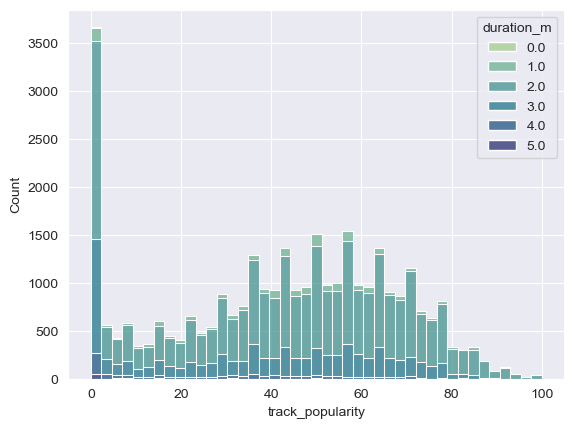

In [13]:
sns.histplot(data=data, x="track_popularity", hue="duration_m", multiple="stack",
             palette="crest")

<Axes: xlabel='track_popularity', ylabel='Count'>

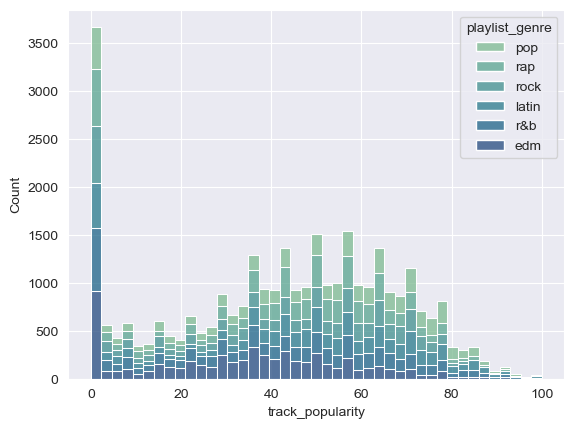

In [12]:
sns.histplot(data=data, x="track_popularity", hue="playlist_genre", multiple="stack",
             palette="crest")

<Axes: xlabel='month', ylabel='Count'>

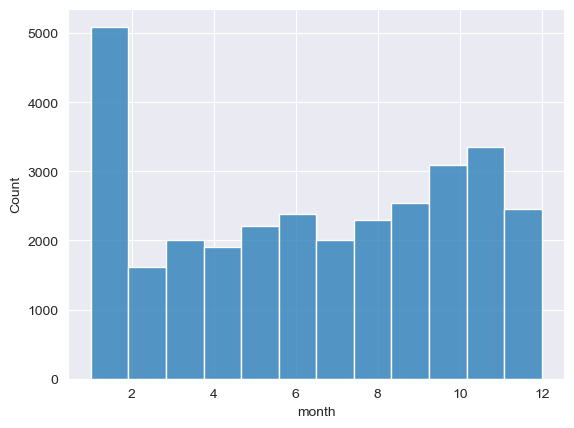

In [84]:
sns.histplot(data=data[data["month"] >= 0], x="month", bins=12)

<Axes: xlabel='playlist_genre', ylabel='Count'>

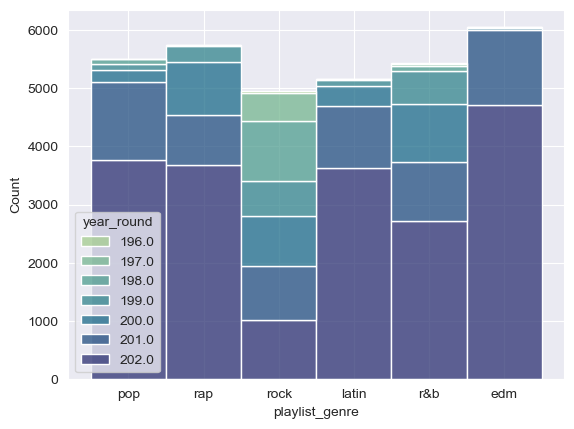

In [11]:
sns.histplot(data=data, x="playlist_genre", hue="year_round", multiple="stack", palette="crest")

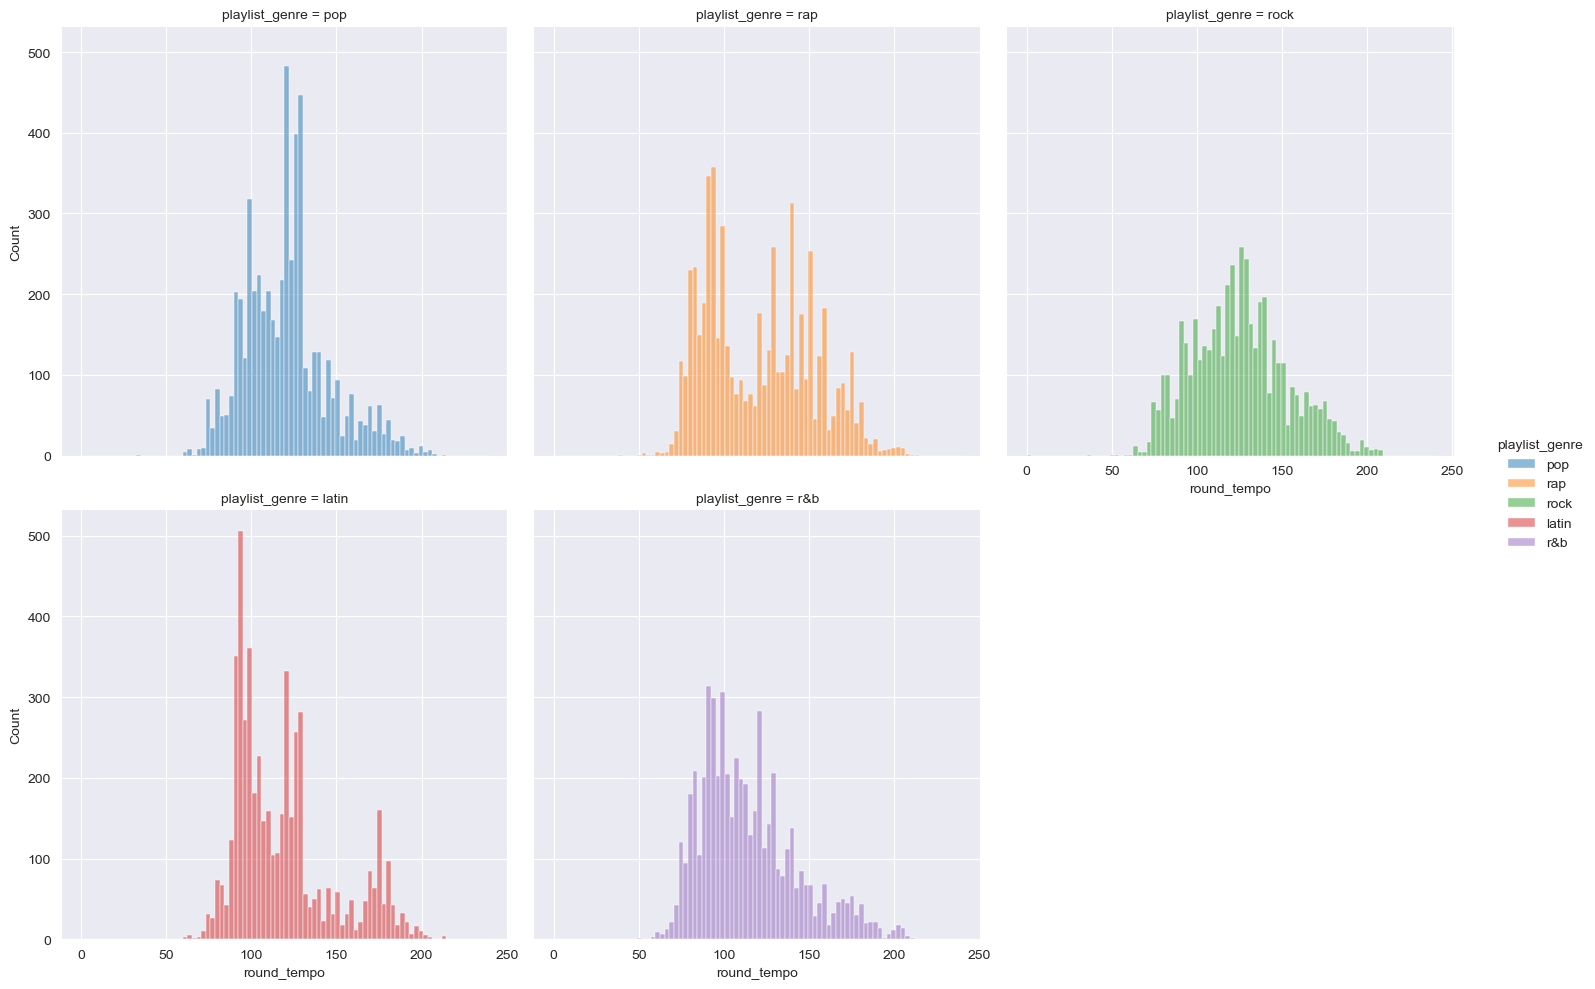

In [54]:
sns.displot(data=data[data["playlist_genre"] != "edm"], x="round_tempo", col="playlist_genre", hue="playlist_genre",
            col_wrap=3)

C:\Users\tobia\AppData\Local\Temp\ipykernel_21864\3055289773.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x="duration_ms", palette="crest")


<Axes: xlabel='duration_ms', ylabel='Count'>

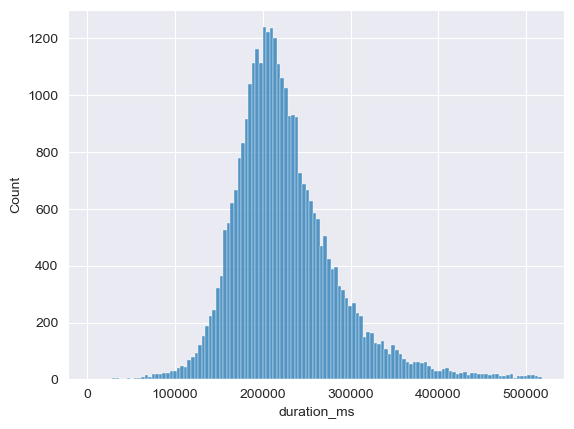

In [14]:
sns.histplot(data=data, x="duration_ms")

<Axes: xlabel='playlist_genre', ylabel='Count'>

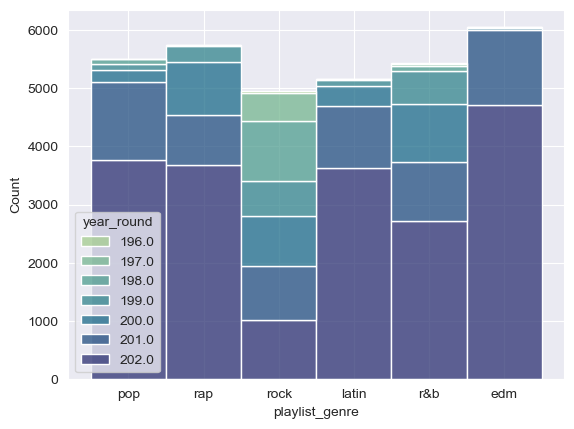

In [32]:
sns.histplot(data=data, x="playlist_genre", hue="year_round", palette="crest", multiple="stack")

<Axes: xlabel='playlist_genre', ylabel='Count'>

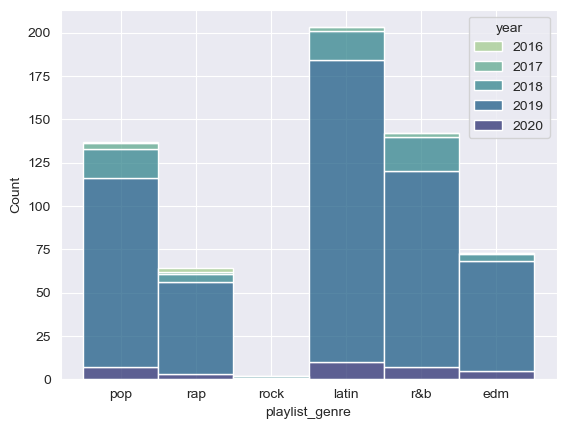

In [27]:
sns.histplot(data=data[(data["track_popularity"] > 85) & (data["year"] > 2000)], x="playlist_genre", hue="year",
             palette="crest", multiple="stack")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

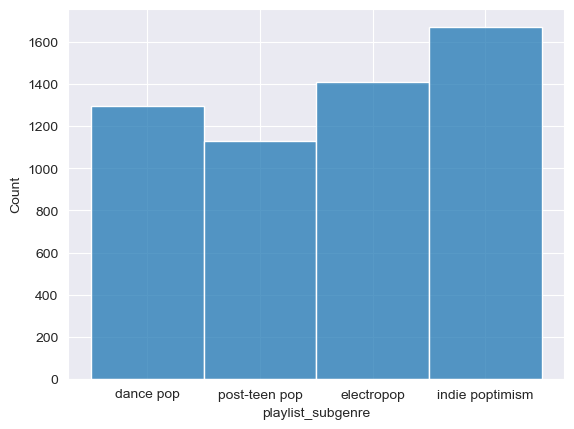

In [64]:
sns.histplot(data=data[data["playlist_genre"] == "pop"], x="playlist_subgenre")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

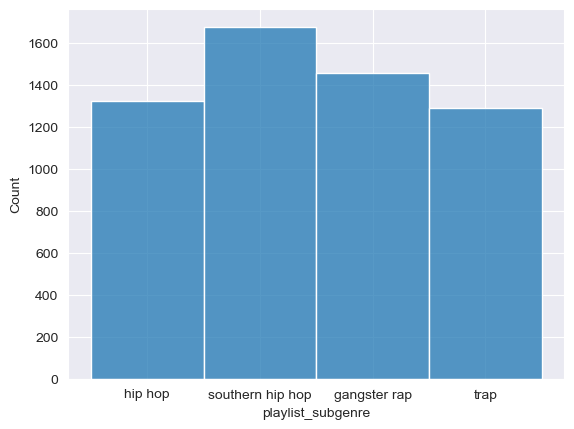

In [65]:
sns.histplot(data=data[data["playlist_genre"] == "rap"], x="playlist_subgenre")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

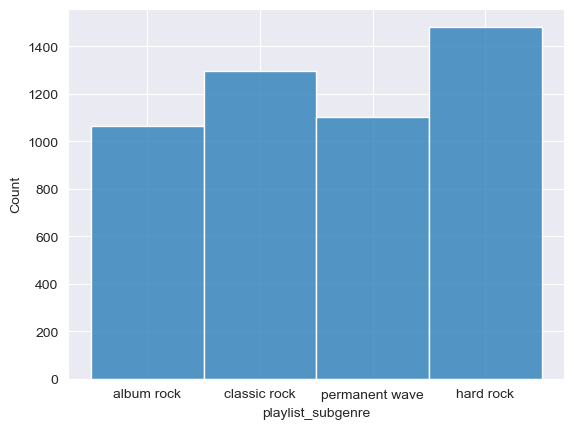

In [103]:
sns.histplot(data=data[data["playlist_genre"] == "rock"], x="playlist_subgenre")

<Axes: xlabel='year', ylabel='Count'>

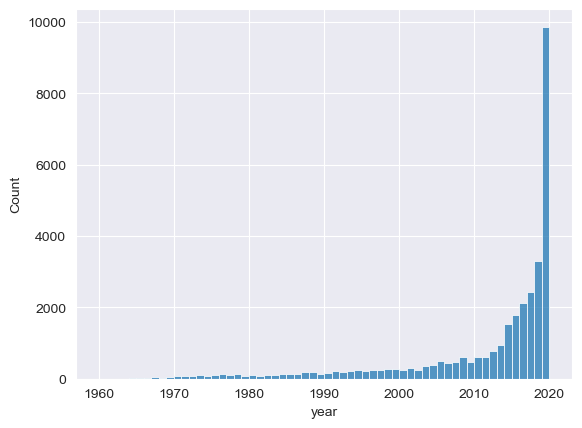

In [115]:
sns.histplot(data=data, x="year", binrange=(1960, 2020), bins=2020 - 1960)

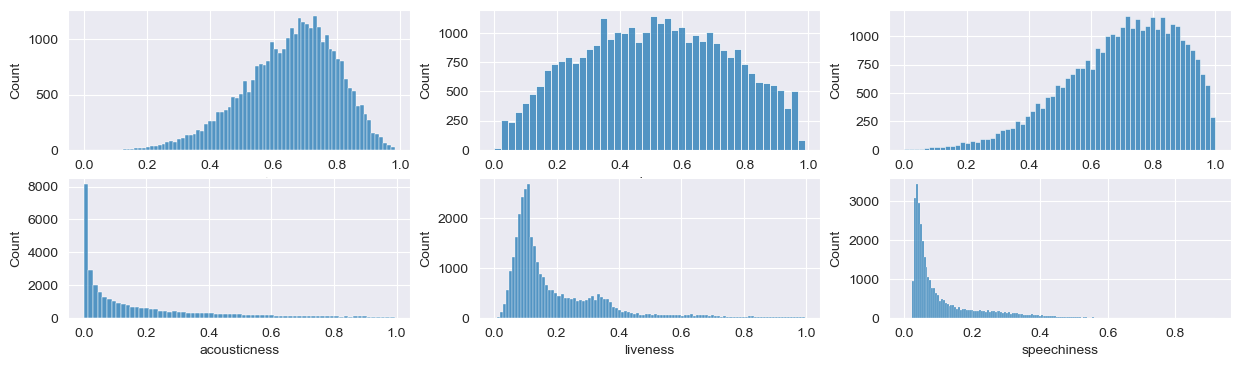

In [8]:
variables = ["danceability", "valence", "energy", "acousticness", "liveness", "speechiness"]

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 4))

axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.histplot(data=data, x=variable, ax=axes[i])
